In [2]:
!pip install trimesh vedo numpy matplotlib imageio


Vértices: 22843
Aristas  : 68322
Caras    : 90968


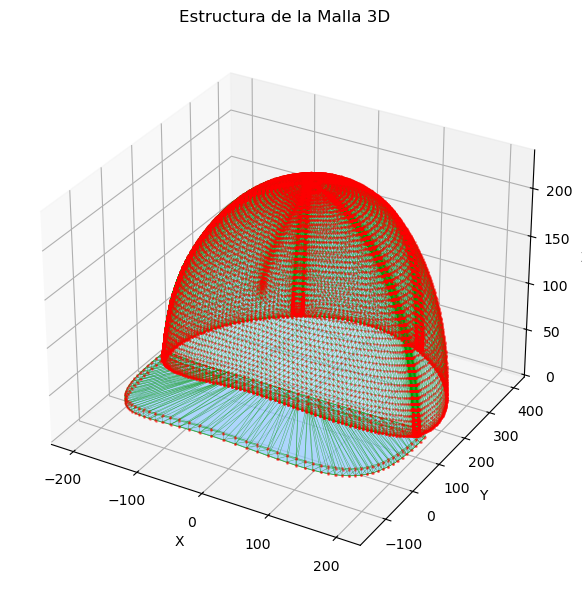

C:\Users\Justi\AppData\Local\Temp\ipykernel_22080\1369036654.py:77: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  img = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


KeyboardInterrupt: 

In [ ]:

import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import imageio
import os

# 1. Ruta y carga del modelo
ruta_modelo = "Cap.stl"
mesh = None
if os.path.isfile(ruta_modelo):
    modelo = trimesh.load(ruta_modelo)
    # Si es Scene, concatenar geometrías
    if isinstance(modelo, trimesh.Scene):
        mesh = trimesh.util.concatenate(tuple(modelo.geometry.values()))
    else:
        mesh = modelo
else:
    print(f"No existe '{ruta_modelo}', usando cubo de ejemplo.")
    mesh = trimesh.creation.box(extents=(1,1,1))

# 2. Extraer datos
verts = mesh.vertices
faces = mesh.faces
edges = mesh.edges_unique

print(f"Vértices: {len(verts)}")
print(f"Aristas  : {len(edges)}")
print(f"Caras    : {len(faces)}")

# 3. Configuración de la figura
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# 4. Dibujar caras primero (azul claro, semitransparente)
poly_collection = Poly3DCollection(verts[faces],
                                   facecolors=(0.6,0.8,1,0.3),
                                   linewidths=0,
                                   edgecolor=None)
poly_collection.set_zorder(1)
ax.add_collection3d(poly_collection)

# 5. Dibujar aristas (verde), sobre las caras
edge_collection = Line3DCollection(verts[edges],
                                   colors=(0,0.6,0,0.7),
                                   linewidths=0.3)
edge_collection.set_zorder(2)
ax.add_collection3d(edge_collection)

# 6. Dibujar vértices solo si no son demasiados (rojo, semi-transparente)
if len(verts) <= 50000:
    ax.scatter(verts[:,0], verts[:,1], verts[:,2],
               color=(1,0,0,0.4),
               s=1,
               depthshade=False,
               zorder=3)
else:
    print("Modelo muy denso, omitiendo puntos de vértice para claridad.")

# 7. Ajustar ejes y título
ax.auto_scale_xyz(verts[:,0], verts[:,1], verts[:,2])
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
plt.title("Estructura de la Malla 3D")
plt.tight_layout()
plt.show()

# 8. Animación de rotación (opcional)
frames = []
for angle in range(0, 360, 15):
    ax.view_init(elev=30, azim=angle)
    fig.canvas.draw()
    img = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(img)

imageio.mimsave('mesh_rotation.gif', frames, fps=10)
print("GIF guardado como 'mesh_rotation.gif'")
